In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpyro.contrib.forecast import Forecaster, GlobalTrendModel

In [9]:
URL = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/lynx.csv"
lynx = pd.read_csv(URL, index_col=0)
data = lynx["value"].values.astype(float)
print("Length of time series:", data.shape[0])

Length of time series: 114


In [3]:
y_train, y_test = data[:80], data[80:]
model = GlobalTrendModel(seasonality=38, generalized_seasonality=True, level_method="seasAvg")
forecaster = Forecaster(model, y_train)

sample: 100%|██████████| 5000/5000 [00:27<00:00, 180.75it/s, 63 steps of size 3.96e-02. acc. prob=0.89]  



                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend     49.34    171.79     13.59   -102.09    218.25    196.31      1.01
       init_s[0]     89.51    107.56     65.84    -64.99    256.90    645.71      1.00
       init_s[1]    -18.58     72.31    -22.95   -133.97     85.80    851.22      1.00
       init_s[2]     27.19     93.33     17.47   -112.95    173.82    821.08      1.00
       init_s[3]    124.92    129.65    104.18    -70.80    316.55    743.70      1.00
       init_s[4]    456.67    253.50    420.90     81.29    805.05    834.87      1.01
       init_s[5]   1177.70    444.43   1094.34    480.38   1863.73    407.09      1.00
       init_s[6]   2056.41    717.21   1947.39    935.44   3069.11    238.86      1.01
       init_s[7]   3697.65   1154.97   3508.92   1879.32   5397.71    245.61      1.01
       init_s[8]   2644.56    889.98   2524.56   1245.17   3872.34    215.89      1.02
       init_s[9]    968.28    466.82    88

In [4]:
forecast = forecaster(y_train, np.empty((data.shape[0], 0)))

In [5]:
y_pred = np.median(forecast, axis=0)
sMAPE = np.mean(np.abs(y_pred - y_test) / (y_pred + y_test)) * 200
msqrt = np.sqrt(np.mean((y_pred - y_test) ** 2))
print("sMAPE: {:.2f}, rmse: {:.2f}".format(sMAPE, msqrt))

sMAPE: 64.92, rmse: 1262.77


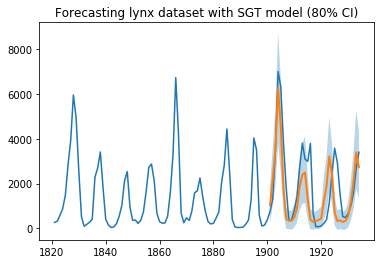

In [8]:
plt.plot(lynx["time"], data)
hpd_low, hpd_high = np.percentile(forecast, (10, 90), axis=0)
plt.plot(lynx["time"][80:], y_pred, lw=2)
plt.fill_between(lynx["time"][80:], hpd_low, hpd_high, alpha=0.3)
plt.title("Forecasting lynx dataset with SGT model (80% CI)");